In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Disattiviamo warning che pandas ci manda ogni qual volta modifichiamo una copia di un altro Dataframe senza specificare che questa sia
# una copia indipendente dall'altra tramite il metodo .copy()
pd.options.mode.chained_assignment = None

print("Inizio progetto Maicol Santi")
print("Dati presi da: https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0850DAI,1.0/VOLUNTEERING/DCSA_VOLON1")
print("Processo di pulizia e unione dei dati")

# Costanti
DATASETS_FOLDER_NAME = "datasets"
ASSETS_FOLDER_NAME = "results_assets"
# Costanti per indicatore
VVOL_P = "PGE15_UAPV" # -> Codice per volontariato in %
VVOL_N = "PGE15_UAAV" # -> Codice per volontario in numeri migliaia
MEDN_ORE = "HAUA_15" # -> Codice per la media

def csvfile_to_df(filepath: str, sep: str = ",") -> pd.DataFrame:
    try:
        tmpdf = pd.read_csv(filepath, sep=sep)
        print(f"File csv {filepath} letto con successo")
        return tmpdf
    except FileNotFoundError:
        print(f"File csv {filepath} non trovato")
        raise FileNotFoundError
    except Exception as e:
        print("Errore generale nella lettura del file: ", e)
        raise e

# Lista file da leggere
file_list = [
    "REGIONI_TIPO_CONSUMI.csv",
    "AMPIEZZA_FAMIGLIA_CONDIZIONI_ECONOMICHE.csv",
    "NUMERO_ANNI_ATTIVITA_VOLONTARIO.csv",
    "SESSO_TIPO_DI_VOLONTARIATO.csv",
    "TITOLO_DI_STUDIO_CONDIZIONE_LAVORATIVA.csv",
    "SESSO_ETA_TIPO_VOLONTARIATO.csv"
]

# Caricamento di ogni singolo file specificato nella lista
dataframes_list = []
for file in file_list:
    # Creazione automatica path del file
    file_path = os.path.join(DATASETS_FOLDER_NAME, file)
    df = csvfile_to_df(file_path, sep="\t") # -> Lettura file CSV con sep = \t (tabulazione)
    dataframes_list.append(df)
    print(f"{file_path} caricato con successo")

# Check se nessun file è stato caricato correttamente
if not dataframes_list:
    print("Nessun file caricato, non si procede")
else:
    # Concatena tutti i DataFrame in uno unico
    master_df = pd.concat(dataframes_list, axis=0, ignore_index=True)

    # Definizione delle colonne da eliminare
    cols_to_drop = [
        'FREQ', 'Frequenza', 'Territorio', 'Indicatore', 'Tipo di volontariato',
        'Ampiezza della famiglia', 'Risorse economiche della famiglia',
        'Sesso', 'Numero di anni di attività gratuita', 'Tipo di attività svolta',
        'Titolo di studio', 'Condizione lavorativa', 'Età',
        'OBS_STATUS', "'Stato dell\"'osservazione'"
    ]
    cleaned_df = master_df.drop(columns=cols_to_drop, errors='ignore')

    # Cambiare il nome delle colonne per chiarezza
    rename_map = {
        'TIME_PERIOD': 'Anno',
        'Osservazione': 'Valore',
        'REF_AREA': 'Territorio_Code',
        'DATA_TYPE': 'Indicatore_Code',
        'FORM_VOLUNT': 'TipoVolontariato_Code',
        'NUMBER_HOUSEHOLD_COMP': 'AmpiezzaFamiglia_Code',
        'FAM_ECON_RESOURCES': 'RisorseEconomiche_Code',
        'SEX': 'Sesso_Code',
        'YEARS_OF_ACTIVITIES': 'AnniAttivita_Code',
        'TYPE_ACTIVITY_PERFORMED': 'TipoAttivita_Code',
        'EDU_LEV_HIGHEST': 'TitoloStudio_Code',
        'LABOUR_PROFESS_STATUS_C': 'CondizioneLavorativa_Code',
        'AGE': 'Eta_Code'
    }
    cleaned_df = cleaned_df.rename(columns=rename_map)

    # Conversione del campo 'Valore' in numerico
    cleaned_df['Valore'] = pd.to_numeric(cleaned_df['Valore'], errors='coerce')

    # Salvataggio del DataFrame pulito
    final_dataset_name = "DATASET_VOLONTARIO.csv"
    final_dataset_path = os.path.join(DATASETS_FOLDER_NAME, final_dataset_name)
    cleaned_df.to_csv(final_dataset_path, index=False)
    print(f"Creazione dataset pulito {final_dataset_path} avvenuta con successo")

Inizio progetto Maicol Santi
Dati presi da: https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0850DAI,1.0/VOLUNTEERING/DCSA_VOLON1
Processo di pulizia e unione dei dati
File csv datasets/REGIONI_TIPO_CONSUMI.csv letto con successo
datasets/REGIONI_TIPO_CONSUMI.csv caricato con successo
File csv datasets/AMPIEZZA_FAMIGLIA_CONDIZIONI_ECONOMICHE.csv letto con successo
datasets/AMPIEZZA_FAMIGLIA_CONDIZIONI_ECONOMICHE.csv caricato con successo
File csv datasets/NUMERO_ANNI_ATTIVITA_VOLONTARIO.csv letto con successo
datasets/NUMERO_ANNI_ATTIVITA_VOLONTARIO.csv caricato con successo
File csv datasets/SESSO_TIPO_DI_VOLONTARIATO.csv letto con successo
datasets/SESSO_TIPO_DI_VOLONTARIATO.csv caricato con successo
File csv datasets/TITOLO_DI_STUDIO_CONDIZIONE_LAVORATIVA.csv letto con successo
datasets/TITOLO_DI_STUDIO_CONDIZIONE_LAVORATIVA.csv caricato con successo
File csv datasets/SESSO_ETA_TIPO_VOLONTARIATO.csv letto con successo
datasets/SESSO_ETA_TIPO_VOLONTARIATO.csv caricato

File csv datasets/DATASET_VOLONTARIO.csv letto con successo
Analisi sulla percentuale di suddivisione della percentuale di volontariato suddiviso per le aree geografiche Italiane
Dati geografici trovati e pronti:
    Territorio_Code Ripartizione  Valore
141             ITD     Nord-Est    13.1
31              ITC   Nord-Ovest    10.9
295             ITE       Centro     8.8
559             ITG        Isole     7.3
405             ITF          Sud     4.7

Grafico 'results_assets/analisi_area_geografica.png' salvato

Analisi sulla percentuale di suddivisione della percentuale di volontariato suddiviso per le aree geografiche Italiane completata

Dall'analisi risulta che l'are geografica con la maggiore performance di volontariato sulla popolazione è Nord-Est
con un valore di 13.1%.
Mentre l'area geografica che possiede la minor percentuale di volontariato sulla popolazione è Sud
con una percentuale di 4.7%.


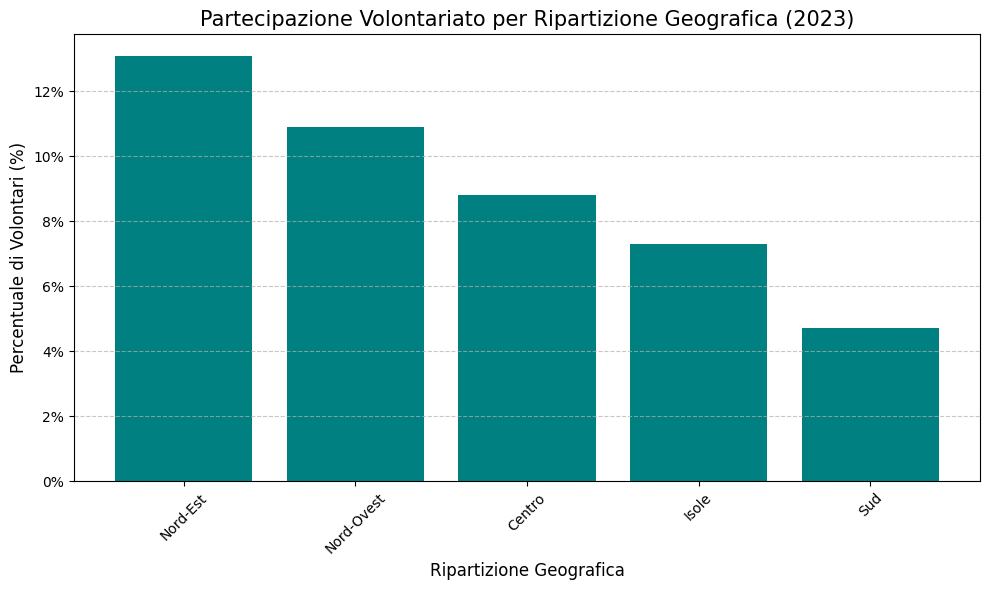

In [25]:
# Caricamento Dataframe finale dal path creato prima
df = csvfile_to_df(final_dataset_path)

print("Analisi sulla percentuale di suddivisione della percentuale di volontariato suddiviso per le aree geografiche Italiane")

# Filtrare solo la parte di dataset che ci interessa, quella con PGE15_UAPV (Persone che hanno svolto volontariato espresso in %)
df_to_analyze = df[df['Indicatore_Code'] == VVOL_P].copy()
if df_to_analyze.empty:
    print(f"Indicatore percentuale '{VVOL_P}' non trovato usiamo un fallback '{VVOL_N}' ")
    # Se non esiste il valore percentuale usiamo il valore in numero a migliaia
    df_to_analyze = df[df['Indicatore_Code'] == VVOL_N].copy()
    y_label = 'Numero di Persone (in Migliaia)'

    # IMPORTANTE: dividere per 1000 altrimenti sul grafico la visualizzazione non è piacevole 
    # le visualizzazioni saranno quindi da considerarsi in MILIONI
    df_to_analyze['Valore'] = df_to_analyze['Valore'] / 1000

    um = 'K'
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.0f}{um}') # -> Funzione lambda per trasformare i numeri in un formato arrotondato - ES: 4.123 in 4K
else:
    y_label = 'Percentuale di Volontari (%)'
    um = '%'
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.0f}{um}') # -> Come sopra ma senza K in quanto qui è un valore percentuale

# Codici delle aree geografiche italiane
geoarea_codes = ['ITC', 'ITD', 'ITE', 'ITF', 'ITG']

# Mappa per le etichette da usare nel grafico
map_ripartizioni = {
    'ITC': 'Nord-Ovest',
    'ITD': 'Nord-Est',
    'ITE': 'Centro',
    'ITF': 'Sud',
    'ITG': 'Isole'
}

# Filtro dei dati, prendiamo solo i dati del 2023 (i più recenti), per il totale volontariato, e solo per le ripartizioni
df_geo = df_to_analyze[
    (df_to_analyze['Anno'] == 2023) &
    (df_to_analyze['TipoVolontariato_Code'] == 'TOTAL') &
    (df_to_analyze['Territorio_Code'].isin(geoarea_codes)) # -> SOLO le aree che abbiamo selezionato per pulizia
]

# Isolamento dei totali, prendiamo quindi l'unica riga di quelle filtrate che ha tutte le colonne nella lista nulle
# in quanto è la riga che indica la percentuale corretta
dim_cols = ['AmpiezzaFamiglia_Code', 'RisorseEconomiche_Code', 'Sesso_Code', 
            'AnniAttivita_Code', 'TipoAttivita_Code', 'TitoloStudio_Code', 
            'CondizioneLavorativa_Code', 'Eta_Code']
df_geo_totals = df_geo[df_geo[dim_cols].isnull().all(axis=1)].copy() # -> Controlla che tutte quelle colonne siano Null

if df_geo_totals.empty:
    print("Dati per le ripartizioni non trovati")
else:
    # Mappare i codici alle descrizioni, JOIN tra Il codice territorio e i codici che sono stati identificati
    df_geo_totals['Ripartizione'] = df_geo_totals['Territorio_Code'].map(map_ripartizioni)
    
    # Ordinamento dei dati per il grafico (dal più alto al più basso)
    df_geo_sorted = df_geo_totals.sort_values(by='Valore', ascending=False)
    
    print("Dati geografici trovati e pronti:")
    print(df_geo_sorted[['Territorio_Code', 'Ripartizione', 'Valore']])

    # Grafico
    plt.figure(figsize=(10, 6)) # Tela
    plt.bar(df_geo_sorted['Ripartizione'], df_geo_sorted['Valore'], color='teal') # Grafico barre
    plt.title('Partecipazione Volontariato per Ripartizione Geografica (2023)', fontsize=15) # Titolo
    plt.xlabel('Ripartizione Geografica', fontsize=12) # Label asse x
    plt.ylabel(y_label, fontsize=12) # Label asse y
    
    # Formatter per le percentuali su asse y
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_area_geografica.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath) # Salva risultato
    print(f"\nGrafico '{result_filepath}' salvato")

print("\nAnalisi sulla percentuale di suddivisione della percentuale di volontariato suddiviso per le aree geografiche Italiane completata")
print(f"""
Dall'analisi risulta che l'are geografica con la maggiore performance di volontariato sulla popolazione è {df_geo_sorted["Ripartizione"].iloc[0]}
con un valore di {df_geo_sorted["Valore"].iloc[0]}{um}.
Mentre l'area geografica che possiede la minor percentuale di volontariato sulla popolazione è {df_geo_sorted["Ripartizione"].iloc[len(df_geo_sorted)-1]}
con una percentuale di {df_geo_sorted["Valore"].iloc[len(df_geo_sorted)-1]}{um}.""")

File csv datasets/DATASET_VOLONTARIO.csv letto con successo
Analisi demografica per età
Grafico 'results_assets/analisi_eta.png' salvato

Analisi demografica per età completata

Dall'analisi emerge che la fascia di età che ha la maggior percentuale di partecipazione è Y65-74 con 12.3%.
Mentre la fascia di età con la minore percentuale è Y_GE75 con 6.1%.

In linea generale si puà vedere come al crescere dell'età cresce anche la percentuale di volontariato, con una drastica diminuzione della fascia più vecchia.


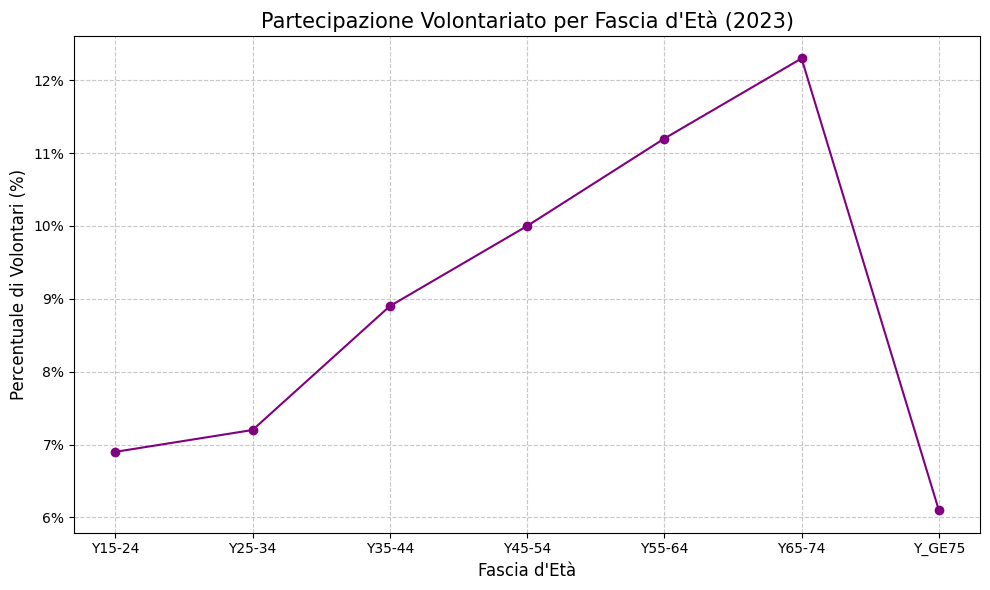

In [33]:
# Caricamento Dataframe finale dal path creato prima
df = csvfile_to_df(final_dataset_path)

print("Analisi demografica per età")

# Filtrare solo la parte di dataset che ci interessa, quella con PGE15_UAPV (Persone che hanno svolto volontariato espresso in %)
df_to_analyze = df[df['Indicatore_Code'] == VVOL_P].copy()

# Filtro sui dati che contengono 'Eta_Code'
df_eta_slice = df_to_analyze[df_to_analyze['Eta_Code'].notnull()].copy()

# Filtro per il 2023 (più recente), per il totale 'Sesso' (9) e 'TipoVolontariato' (TOTAL) e escludendo il totale 'Eta_Code' ('Y_GE15')
df_eta = df_eta_slice[
    (df_eta_slice['Anno'] == 2023) &
    (df_eta_slice['Sesso_Code'] == 9) &
    (df_eta_slice['TipoVolontariato_Code'] == "TOTAL") &
    (df_eta_slice['Eta_Code'] != "Y_GE15")
]

# Ordine per le fasce d'età
eta_order = ['Y15-24', 'Y25-34', 'Y35-44', 'Y45-54', 'Y55-64', 'Y65-74', 'Y_GE75']

try:
    # Eta_Code in una categoria ordinata
    df_eta['Eta_Code'] = pd.Categorical(df_eta['Eta_Code'], categories=eta_order, ordered=True) # -> Trasforma lla colonna in un oggetto ordinato
    df_eta_sorted = df_eta.sort_values('Eta_Code')
except Exception as e:
    print(f"Errore nell'ordinamento età: {e} per fallback si usa l'ordinamento alfabetico")
    df_eta_sorted = df_eta.sort_values('Eta_Code')

if df_eta_sorted.empty:
    print("Nessun dato trovato per l'analisi per età")
else:
    plt.figure(figsize=(10, 6))
    # Grafico a linee per mostrare il trend con l'età
    plt.plot(df_eta_sorted['Eta_Code'], df_eta_sorted['Valore'], marker='o', linestyle='-', color='purple')
    plt.title('Partecipazione Volontariato per Fascia d\'Età (2023)', fontsize=15)
    plt.xlabel('Fascia d\'Età', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%')
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_eta.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("\nAnalisi demografica per età completata")
print(f"""
Dall'analisi emerge che la fascia di età che ha la maggior percentuale di partecipazione è {df_eta.sort_values("Valore", ascending=False)["Eta_Code"].iloc[0]} con {df_eta.sort_values("Valore", ascending=False)["Valore"].iloc[0]}%.
Mentre la fascia di età con la minore percentuale è {df_eta.sort_values("Valore", ascending=True)["Eta_Code"].iloc[0]} con {df_eta.sort_values("Valore", ascending=True)["Valore"].iloc[0]}%.
""")
print("In linea generale si puà vedere come al crescere dell'età cresce anche la percentuale di volontariato, con una drastica diminuzione della fascia più vecchia.")

File csv datasets/DATASET_VOLONTARIO.csv letto con successo
Analisi sul livello di istruzione
Dati per l'analisi:
          Titolo di Studio  Valore
1635  Elementare / Nessuno     3.9
1637         Licenza Media     7.6
1639               Diploma     9.5
1641        Laurea e oltre    15.0
Grafico 'results_assets/analisi_istruzione.png' salvato
Analisi sul livello di istruzione completata

Dall'analisi si rileva che il titolo di istruzione che statisticamente porta ad una maggior quantitativo di volontariato è Laurea e oltre con
una percentuale di 15.0%.
Mentre il titolo con il minor quantitativo è Elementare / Nessuno con una percentuale di 3.9%.



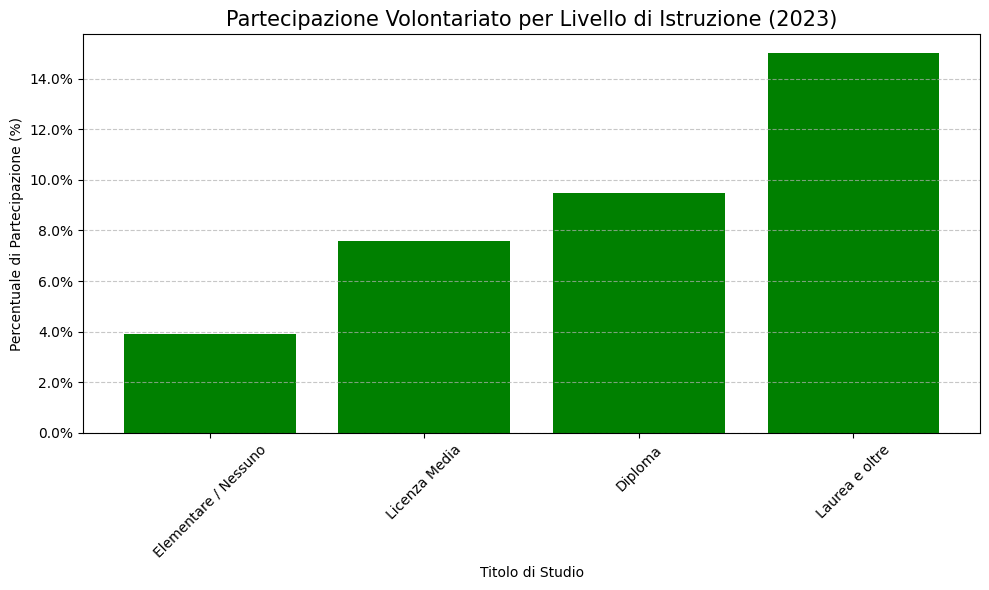

In [ ]:
# Caricamento Dataframe finale dal path creato prima
df = csvfile_to_df(final_dataset_path)

print("Analisi sul livello di istruzione")

# Filtro sui dati percentuali
df_istruzione = df[df['Indicatore_Code'] == VVOL_P].copy()

# Definizione dei codici
# Codici ISTAT: 3=Elementare/Nessuno, 4=Media, 7=Diploma, 11=Laurea
titolo_order_corretto = [3.0, 4.0, 7.0, 11.0]

# Mappa dei codici e la relativà descrizione
map_titolo_corretto = {
    3.0: 'Elementare / Nessuno',
    4.0: 'Licenza Media',
    7.0: 'Diploma',
    11.0: 'Laurea e oltre'
}

# Filtro per i dati che ci interessano al fine dell'analisi
df_istruzione_filtrato = df_istruzione[
    (df_istruzione['Anno'] == 2023) &
    (df_istruzione['TitoloStudio_Code'].isin(titolo_order_corretto)) & # SOLO codici validi
    (df_istruzione['TipoVolontariato_Code'] == "TOTAL") & # Totale Tipo Volontariato
    (df_istruzione['CondizioneLavorativa_Code'] == 99) & # Totale Condizione Lavorativa
    (df_istruzione['Territorio_Code'] == "IT") # Totale Italia
]

if df_istruzione_filtrato.empty:
    print("Dati per l'analisi sull'istruzione non trovati")
else:
    # Mappatura dei codici con le descrizioni definite precedentemente
    df_istruzione_filtrato['Titolo di Studio'] = df_istruzione_filtrato['TitoloStudio_Code'].map(map_titolo_corretto)
    
    # Applichiamo l'ordinamento con l'oggetto categorical
    df_istruzione_filtrato['TitoloStudio_Code'] = pd.Categorical(
        df_istruzione_filtrato['TitoloStudio_Code'], 
        categories=titolo_order_corretto, 
        ordered=True
    )
    df_istruzione_sorted = df_istruzione_filtrato.sort_values('TitoloStudio_Code') # -> Ora il sort_values usa come riferimento l'oggetto categorical

    print("Dati per l'analisi:")
    print(df_istruzione_sorted[['Titolo di Studio', 'Valore']])

    # Creazione grafico a barre
    plt.figure(figsize=(10, 6))
    plt.bar(df_istruzione_sorted['Titolo di Studio'], df_istruzione_sorted['Valore'], color='green')
    
    plt.title('Partecipazione Volontariato per Livello di Istruzione (2023)', fontsize=15)
    plt.ylabel('Percentuale di Partecipazione (%)')
    plt.xlabel('Titolo di Studio')
    plt.xticks(rotation=45)
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%') # Formattazione del risultato ad una cifra decimale ed espresso in %
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_istruzione.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("Analisi sul livello di istruzione completata")

print(f"""
Dall'analisi si rileva che il titolo di istruzione che statisticamente porta ad una maggior quantitativo di volontariato è {df_istruzione_sorted["Titolo di Studio"].iloc[len(df_istruzione_sorted)-1]} con
una percentuale di {df_istruzione_sorted["Valore"].iloc[len(df_istruzione_sorted)-1]}%.
Mentre il titolo con il minor quantitativo è {df_istruzione_sorted["Titolo di Studio"].iloc[0]} con una percentuale di {df_istruzione_sorted["Valore"].iloc[0]}%.
""")
print("Guardando il grafico è comunque notabile ad occhio nudo come al crescere del titolo di istruzione cresce anche la percentuale di volontariato.")

Analisi del genere vs tipo di volontariato
Dati ottenuti:
Sesso             Femmine  Maschi
TipoVolontariato                 
Non Organizzato       5.1     4.8
Organizzato           5.8     6.6
Grafico 'results_assets/analisi_genere_tipo.png' salvato
Analisi sul genere vs tipo di volontariato completata

Dall'analisi possiamo visualizzare come il volontariato Non Organizzato sia dominato dal sesso Femmine con un valore di 5.1.
Invece il volontariato Organizzato è dominato dal sesso Maschi con un valore di 4.8.



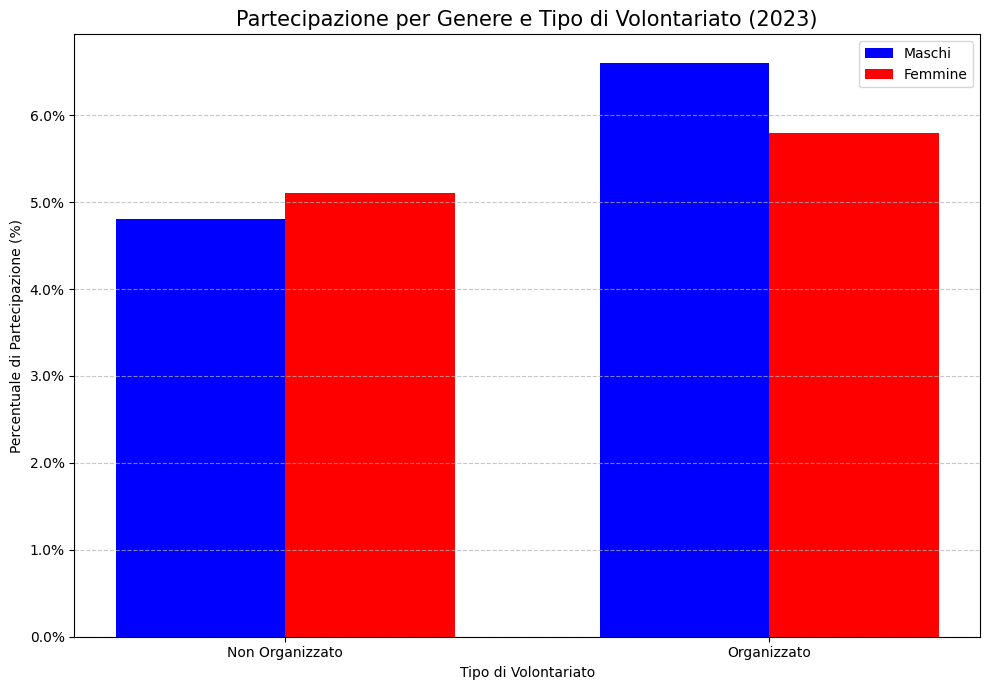

In [24]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

print("Analisi del genere vs tipo di volontariato")

# Set di colori per i grafici
color_palette = {'blu': 'blue', 'rosso': 'red', 'verde': 'green', 'viola': 'purple'}

# Filtro per i dati percentuali
df_genere = df[df['Indicatore_Code'] == VVOL_P].copy()

# Filtro sui dati che ci interessano al fine dell'analisi
df_genere_filtrato = df_genere[
    (df_genere['Anno'] == 2023) &
    (df_genere['Sesso_Code'].isin([1.0, 2.0])) & # 1 = Maschi, 2 = Femmine
    (df_genere['TipoVolontariato_Code'].isin(['ORGVOL', 'DIRVOL'])) & # Organizzato, Non Organizzato
    (df_genere['Territorio_Code'] == 'IT') & # Totale Italia
    (df_genere['Eta_Code'] == 'Y_GE15') # Totale per Età
]

if df_genere_filtrato.empty:
    print("Dati per l'analisi di genere non trovati")
else:
    # Mappa i codici con le descrizioni (pochi valori niente variabile separata)
    df_genere_filtrato['Sesso'] = df_genere_filtrato['Sesso_Code'].map({1.0: 'Maschi', 2.0: 'Femmine'})
    df_genere_filtrato['TipoVolontariato'] = df_genere_filtrato['TipoVolontariato_Code'].map({'ORGVOL': 'Organizzato', 'DIRVOL': 'Non Organizzato'})
    
    # Preparazione dei dati per un grafico a barre raggruppate con una pivot_table per avere Maschi e Femmine come colonne
    df_pivot_genere = df_genere_filtrato.pivot_table(
        index='TipoVolontariato', 
        columns='Sesso', 
        values='Valore'
    )
    
    print("Dati ottenuti:")
    print(df_pivot_genere)

    # Grafico a barre suddivise per genere
    plt.figure(figsize=(10, 7))
    n_gruppi = len(df_pivot_genere.index) # 2 (Organizzato, Non Organizzato)
    ind = np.arange(n_gruppi) # le posizioni x dei gruppi in quanto matplotlib non capisce altrimenti come associare la tip. di volontariato
    width = 0.35 # la larghezza delle barre

    # Barra per i maschi
    plt.bar(ind - width/2, df_pivot_genere['Maschi'], width, label='Maschi', color=color_palette['blu'])
    # Barra per le femmine
    plt.bar(ind + width/2, df_pivot_genere['Femmine'], width, label='Femmine', color=color_palette['rosso'])

    plt.title('Partecipazione per Genere e Tipo di Volontariato (2023)', fontsize=15)
    plt.ylabel('Percentuale di Partecipazione (%)')
    plt.xlabel('Tipo di Volontariato')
    plt.xticks(ind, df_pivot_genere.index) # label asse X
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Formatter per percentuale
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%')
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.tight_layout()
    result_filename = "analisi_genere_tipo.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("Analisi sul genere vs tipo di volontariato completata")

print(f"""
Dall'analisi possiamo visualizzare come il volontariato Non Organizzato sia dominato dal sesso {df_pivot_genere.loc['Non Organizzato'].idxmax()} con un valore di {df_pivot_genere.loc['Non Organizzato', df_pivot_genere.loc['Non Organizzato'].idxmax()]}.
Invece il volontariato Organizzato è dominato dal sesso {df_pivot_genere.loc['Organizzato'].idxmax()} con un valore di {df_pivot_genere.loc['Non Organizzato', df_pivot_genere.loc['Organizzato'].idxmax()]}.
""")

Analisi ore medie vs. età
Dati per l'analisi:
     Eta_Code  Valore
2315   Y15-24    17.1
2317   Y25-34    13.7
2319   Y35-44    13.8
2321   Y45-54    16.4
2323   Y55-64    17.3
2325   Y65-74    23.9
2327   Y_GE75    22.7
Grafico 'results_assets/analisi_ore_medie_eta.png' salvato
Analisi ore medie vs. età completata

Dall'analisi emerge come la fascia d'età che spende maggior tempo sul volontariato è Y65-74 con un valore di 23.9.
La fascià d'età con minor rempo mensile speso sul volontariato è quella di Y25-34 con un valore di 13.7.



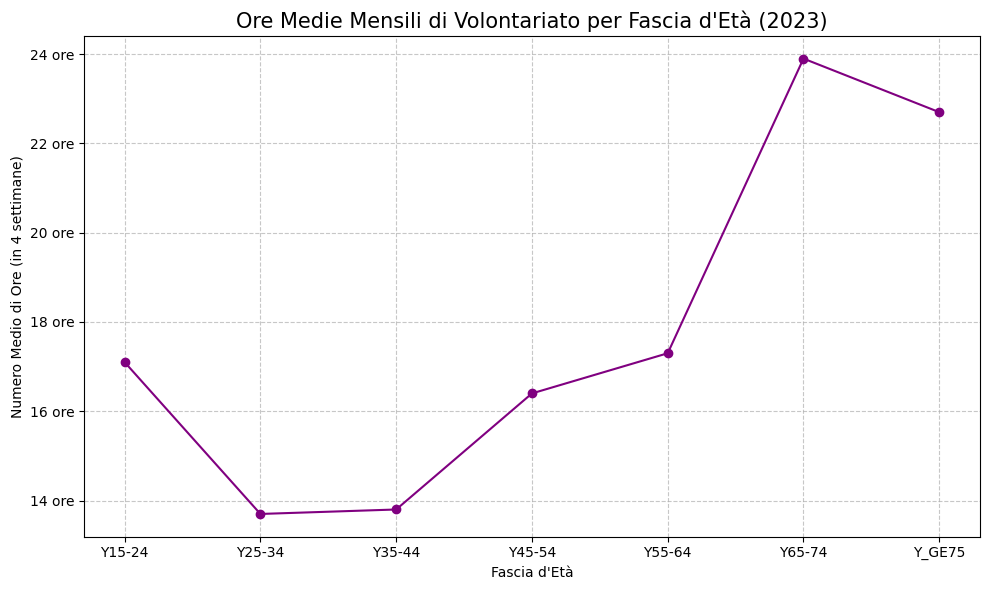

In [ ]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

print("Analisi ore medie vs. età")

# Filtro per l'indicatore ore medie
df_ore = df[df['Indicatore_Code'] == MEDN_ORE].copy()

# Filtro per i dati che contengono Eta_Code
df_ore_filtrato = df_ore[
    (df_ore['Anno'] == 2023) &
    (df_ore['Eta_Code'].notnull()) & # Non nulli in età
    (df_ore['Eta_Code'] != 'Y_GE15') & # Non il totale età
    (df_ore['Sesso_Code'] == 9) & # Prendiamo totale sesso
    (df_ore['TipoVolontariato_Code'] == 'TOTAL') & # Prendiamo totale volontariato
    (df_ore['Territorio_Code'] == 'IT') # Italia
]

if df_ore_filtrato.empty:
    print("Dati per l'analisi non trovati")
else:
    # Ordine logico per l'età
    eta_order = ['Y15-24', 'Y25-34', 'Y35-44', 'Y45-54', 'Y55-64', 'Y65-74', 'Y_GE75']
    
    df_ore_filtrato['Eta_Code'] = pd.Categorical(
        df_ore_filtrato['Eta_Code'], 
        categories=eta_order, 
        ordered=True
    )
    df_ore_sorted = df_ore_filtrato.sort_values('Eta_Code') # -> Ordinato per l'oggetto categorical
    
    print("Dati per l'analisi:")
    print(df_ore_sorted[['Eta_Code', 'Valore']])
    
    # Grafico a linee
    plt.figure(figsize=(10, 6))
    plt.plot(df_ore_sorted['Eta_Code'], df_ore_sorted['Valore'], marker='o', linestyle='-', color=color_palette['viola'])
    
    plt.title('Ore Medie Mensili di Volontariato per Fascia d\'Età (2023)', fontsize=15)
    plt.ylabel('Numero Medio di Ore (in 4 settimane)')
    plt.xlabel('Fascia d\'Età')
    
    # Formatter per i numeri
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.0f} ore') # -> Ore specificate senza decimali
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_ore_medie_eta.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("Analisi ore medie vs. età completata")

print(f"""
Dall'analisi emerge come la fascia d'età che spende maggior tempo sul volontariato è {df_ore_filtrato.sort_values('Valore', ascending=False)['Eta_Code'].iloc[0]} con un valore di {df_ore_filtrato.sort_values('Valore', ascending=False)['Valore'].iloc[0]}.
La fascià d'età con minor rempo mensile speso sul volontariato è quella di {df_ore_filtrato.sort_values('Valore', ascending=True)['Eta_Code'].iloc[0]} con un valore di {df_ore_filtrato.sort_values('Valore', ascending=True)['Valore'].iloc[0]}.

Confrontandola con l'analisi solo per età si può visualizzazione come non ci sia correlazione una forte correlazione tra la fascià d'eta e le ore medie spese in volontariato.
""")


Partecipazione per ripartizione geografica (2023)
Statistiche (per le 5 ripartizioni):
count     5.000000
mean      8.960000
std       3.233883
min       4.700000
25%       7.300000
50%       8.800000
75%      10.900000
max      13.100000
Name: Valore, dtype: float64
Varianza (popolazione): 10.46

Ore Medie per fascia d'età (2023)
Statistiche (per le 7 fasce d'età):
count     7.000000
mean     17.842857
std       4.014913
min      13.700000
25%      15.100000
50%      17.100000
75%      20.000000
max      23.900000
Name: Valore, dtype: float64
Varianza (popolazione): 16.12

Analisi di correlazione (partecipazione vs ore medie per regione)
Dati 'Wide' pronti per la correlazione:
Indicatore_Code  Ore Medie Mensili  Tasso Partecipazione (%)
Territorio_Code                                             
ITC                           20.3                      10.9
ITD                           16.6                      13.1
ITE                           15.8                       8.8
ITF    

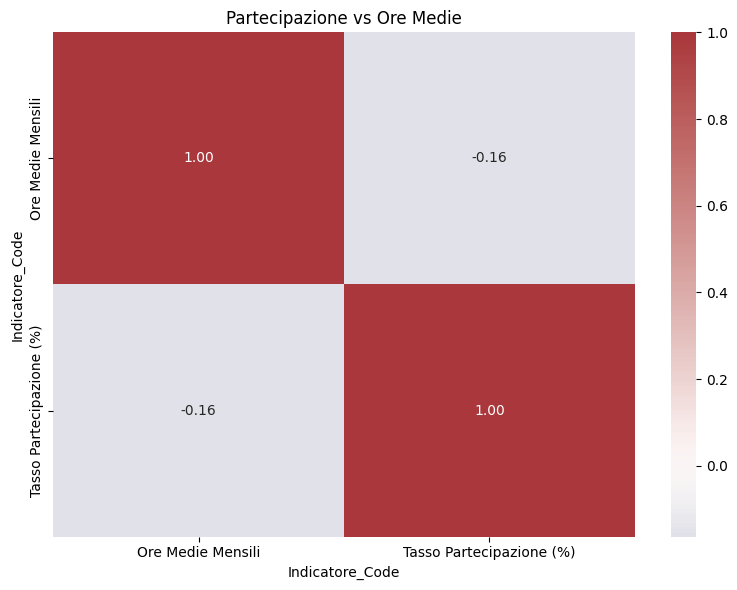

In [ ]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

print("\nPartecipazione per ripartizione geografica (2023)")

# Filtro dati percentuali
df_percent = df[df['Indicatore_Code'] == VVOL_P].copy()
ripartizioni_codes = ['ITC', 'ITD', 'ITE', 'ITF', 'ITG']

df_geo = df_percent[
    (df_percent['Anno'] == 2023) &
    (df_percent['TipoVolontariato_Code'] == 'TOTAL') &
    (df_percent['Territorio_Code'].isin(ripartizioni_codes))
]
# Totali
dim_cols = ['AmpiezzaFamiglia_Code', 'RisorseEconomiche_Code', 'Sesso_Code', 
            'AnniAttivita_Code', 'TipoAttivita_Code', 'TitoloStudio_Code', 
            'CondizioneLavorativa_Code', 'Eta_Code']
df_geo_totals = df_geo[df_geo[dim_cols].isnull().all(axis=1)].copy()

if df_geo_totals.empty:
    print("Dati geografici non trovati, impossibile andare avanti con l'analisi")
else:
    # Usiamo .describe() per le statistiche principali
    print("Statistiche (per le 5 ripartizioni):")
    print(df_geo_totals['Valore'].describe())
    
    # Calcoliamo e stampiamo la varianza
    varianza_geo = df_geo_totals['Valore'].var()
    print(f"Varianza (popolazione): {varianza_geo:.2f}")

print("\nOre Medie per fascia d'età (2023)")

# Filtro per l'indicatore ore medie
df_ore = df[df['Indicatore_Code'] == MEDN_ORE].copy()

eta_order = ['Y15-24', 'Y25-34', 'Y35-44', 'Y45-54', 'Y55-64', 'Y65-74', 'Y_GE75']

df_ore_filtrato = df_ore[
    (df_ore['Anno'] == 2023) &
    (df_ore['Eta_Code'].isin(eta_order)) & # Solo le fasce d'età, no totali
    (df_ore['Sesso_Code'] == 9) & 
    (df_ore['TipoVolontariato_Code'] == 'TOTAL') & 
    (df_ore['Territorio_Code'] == 'IT') 
]

if df_ore_filtrato.empty:
    print("Dati per ore medie vs età non trovati")
else:
    print("Statistiche (per le 7 fasce d'età):")
    print(df_ore_filtrato['Valore'].describe())
    
    # Calcoliamo e stampiamo la varianza
    varianza_ore = df_ore_filtrato['Valore'].var()
    print(f"Varianza (popolazione): {varianza_ore:.2f}")

print("\nAnalisi di correlazione (partecipazione vs ore medie per regione)")
# Vogliamo correlare percentuale e ore medie
indicatori_da_correlare = [VVOL_P, MEDN_ORE]

# Filtro dati
df_corr = df[
    (df['Anno'] == 2023) &
    (df['Territorio_Code'].isin(ripartizioni_codes)) &
    (df['Indicatore_Code'].isin(indicatori_da_correlare)) &
    (df['TipoVolontariato_Code'] == 'TOTAL')
].copy()

# Isoliamo i totali
df_corr_totals = df_corr[df_corr[dim_cols].isnull().all(axis=1)]

# Crea tabella pivot con dimensione riga il territorio e dimensione colonna l'indicatore utilizzato procedentemente
# come metrica invece utilizziamo il valore all'interno del dataset
df_wide = df_corr_totals.pivot_table(
    index='Territorio_Code', 
    columns='Indicatore_Code', 
    values='Valore'
)

# Rinominiamo le colonne per chiarezza
df_wide = df_wide.rename(columns={
    VVOL_P: 'Tasso Partecipazione (%)',
    MEDN_ORE: 'Ore Medie Mensili'
})

print("Dati 'Wide' pronti per la correlazione:")
print(df_wide)

# Calcoliamo la matrice di correlazione
correlation_matrix = df_wide.corr()

print("\nMatrice di Correlazione:")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
# annot=True scrive i numeri (i coefficienti di correlazione) dentro le celle
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', center=0, fmt='.2f')
plt.title('Partecipazione vs Ore Medie')
plt.tight_layout()
result_filename = "analisi_correlazione_heatmap.png"
result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
plt.savefig(result_filepath)
print(f"Grafico '{result_filepath}' salvato")

print("\nAnalisi di correlazione (partecipazione vs ore medie per regione) completata")


Condizione lavorativa vs. ore medie
Grafico 'results_assets/analisi_condizione_lavorativa_ore.png' salvato

Condizione lavorativa vs. ore medie completata

Dall'analisi si può verificare come la categoria con la maggior media mensile di volontariato siano quelli in "Ritirato-a dal lavoro" con una media di 23.1 ore mensili.
La categoria con la minor media invece è quella dei Occupato con una media di 13.8



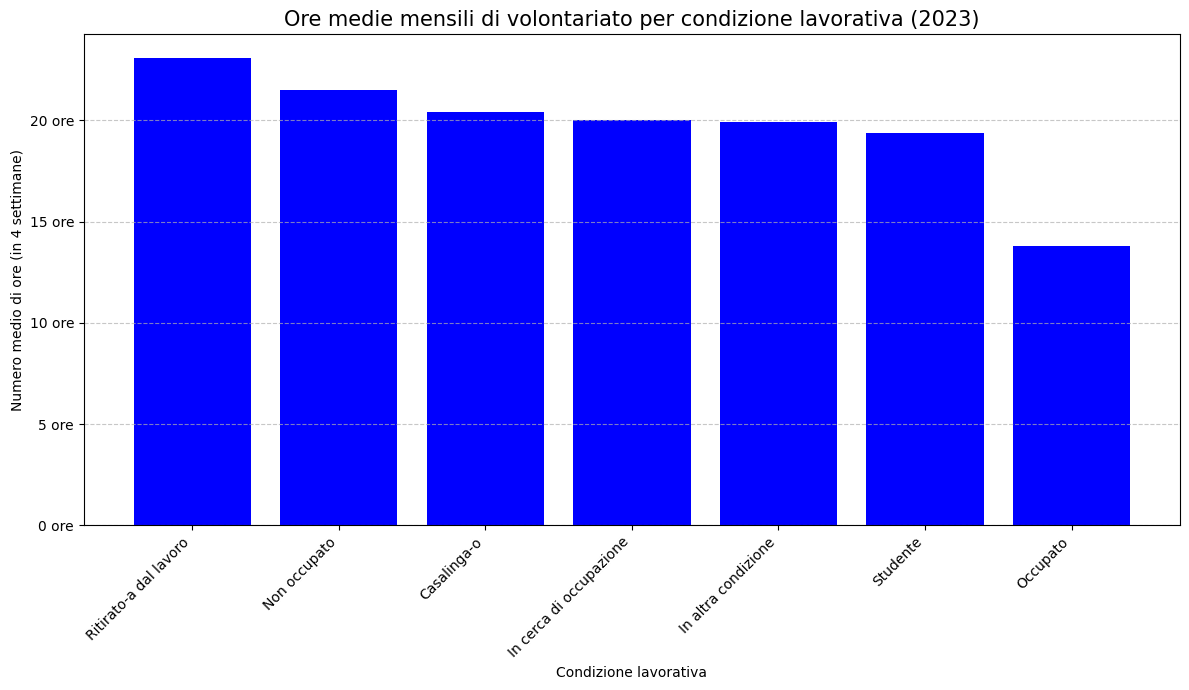

In [ ]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

# Definiamo un set di colori
color_palette = {'blu': 'blue', 'rosso': 'red', 'verde': 'green', 'viola': 'purple', 'arancione': 'orange'}

print("\nCondizione lavorativa vs. ore medie")

# Filtro per l'indicatore ore medie
df_lavoro = df[df['Indicatore_Code'] == MEDN_ORE].copy()

# Definizione dei codici e mappa (dall'ispezione)
codici_lavoro_validi = [1.0, 11.0, 4.0, 5.0, 6.0, 7.0, 12.0]
map_lavoro = {
    1.0: 'Occupato', 11.0: 'Non occupato', 4.0: 'Casalinga-o',
    5.0: 'Studente', 6.0: 'Ritirato-a dal lavoro', 7.0: 'In altra condizione',
    12.0: 'In cerca di occupazione'
}

# Filtro dei dati
df_lavoro_filtrato = df_lavoro[
    (df_lavoro['Anno'] == 2023) &
    (df_lavoro['CondizioneLavorativa_Code'].isin(codici_lavoro_validi)) &
    (df_lavoro['TitoloStudio_Code'] == 99) & # Tot.
    (df_lavoro['TipoVolontariato_Code'] == 'TOTAL') &
    (df_lavoro['Territorio_Code'] == 'IT')
].copy()

if df_lavoro_filtrato.empty:
    print("Dati per l'analisi sulla condizione lavorativa non trovati")
else:
    # Mappa e ordinamento
    df_lavoro_filtrato['Condizione'] = df_lavoro_filtrato['CondizioneLavorativa_Code'].map(map_lavoro)
    df_lavoro_sorted = df_lavoro_filtrato.sort_values(by='Valore', ascending=False)
    
    # Grafico a barre
    plt.figure(figsize=(12, 7))
    plt.bar(df_lavoro_sorted['Condizione'], df_lavoro_sorted['Valore'], color=color_palette['blu'])
    
    plt.title('Ore medie mensili di volontariato per condizione lavorativa (2023)', fontsize=15)
    plt.ylabel('Numero medio di ore (in 4 settimane)')
    plt.xlabel('Condizione lavorativa')
    plt.xticks(rotation=45, ha='right')
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.0f} ore') # Formato a 0 cifre decimali
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_condizione_lavorativa_ore.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("\nCondizione lavorativa vs. ore medie completata")

print(f"""
Dall'analisi si può verificare come la categoria con la maggior media mensile di volontariato siano quelli in "{df_lavoro_sorted['Condizione'].iloc[0]}" con una media di {df_lavoro_sorted['Valore'].iloc[0]} ore mensili.
La categoria con la minor media invece è quella dei {df_lavoro_sorted['Condizione'].iloc[len(df_lavoro_sorted)-1]} con una media di {df_lavoro_sorted['Valore'].iloc[len(df_lavoro_sorted)-1]}.

Sicuramente si può vedere come le categorie con minore impegno mensile siano correlate con le fascie d'eta, in quanto le fasce d'eta con il minore impegno sono anche quelle che
generalmente sono, in quell'età, studenti o lavoratori occupati.
Al contrario le categorie con maggiore importo mensile di ore sono quelle in cui generalmente la fascia d'età è maggiore, come per esempio i pensionati. 
""")


Dimensione comune vs. partecipazione
Grafico 'results_assets/analisi_dimensione_comune_perc.png' salvato

Dimensione comune vs. partecipazione

Dall'analisi si denota che la dimensione dei comuni con maggiore partecipazione al volontariato è Fino a 2.000 ab. con un valore di 11.1.
La dimensione con minore partecipazione ad attività di volontariato è 50.001 ab. e più con un valore di 8.1.



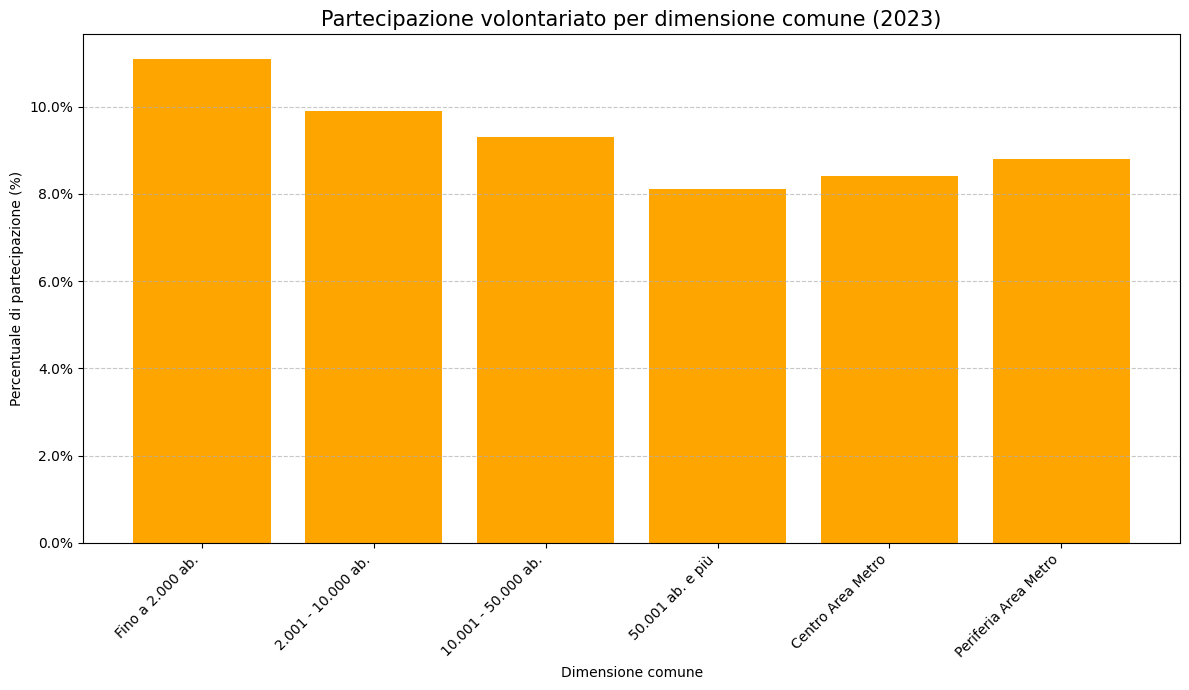

In [57]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

print("\nDimensione comune vs. partecipazione")

# Definiamo un set di colori
color_palette = {'blu': 'blue', 'rosso': 'red', 'verde': 'green', 'viola': 'purple', 'arancione': 'orange'}

# Filtro per l'indicatore percentuale
df_comuni = df[df['Indicatore_Code'] == VVOL_P].copy()

# Codici e mappa descrizione
codici_comune_validi = ['2', '3', '6', '7', '8', '9']
map_comuni = {
    '2': 'Centro Area Metro', '3': 'Periferia Area Metro',
    '6': 'Fino a 2.000 ab.', '7': '2.001 - 10.000 ab.',
    '8': '10.001 - 50.000 ab.', '9': '50.001 ab. e più'
}
# Ordinamento logico
ordine_comuni = ['6', '7', '8', '9', '2', '3']

# Filtro dei dati per l'analisi
df_comuni_filtrato = df_comuni[
    (df_comuni['Anno'] == 2023) &
    (df_comuni['Territorio_Code'].isin(codici_comune_validi)) &
    (df_comuni['TipoVolontariato_Code'] == 'TOTAL')
].copy()

# Isolamento dei totali rispetto alle altre dimensioni
dim_cols = ['AmpiezzaFamiglia_Code', 'RisorseEconomiche_Code', 'Sesso_Code', 
            'AnniAttivita_Code', 'TipoAttivita_Code', 'TitoloStudio_Code', 
            'CondizioneLavorativa_Code', 'Eta_Code']
df_comuni_totals = df_comuni_filtrato[df_comuni_filtrato[dim_cols].isnull().all(axis=1)].copy()

if df_comuni_totals.empty:
    print("Dati per analisi sulla dimensione del comune non trovati")
else:
    # Mappa e ordinamento
    df_comuni_totals['Dimensione Comune'] = df_comuni_totals['Territorio_Code'].map(map_comuni) # Mappa codice con descrizione
    df_comuni_totals['Territorio_Code'] = pd.Categorical(
        df_comuni_totals['Territorio_Code'],
        categories=ordine_comuni,
        ordered=True
    ) # Crea oggetto categorical di ordinamento
    df_comuni_sorted = df_comuni_totals.sort_values('Territorio_Code') # Ordina per l'oggetto precedentemente creato
    
    # Grafico a barre
    plt.figure(figsize=(12, 7))
    plt.bar(df_comuni_sorted['Dimensione Comune'], df_comuni_sorted['Valore'], color=color_palette['arancione'])
    
    plt.title('Partecipazione volontariato per dimensione comune (2023)', fontsize=15)
    plt.ylabel('Percentuale di partecipazione (%)')
    plt.xlabel('Dimensione comune')
    plt.xticks(rotation=45, ha='right')
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%') # Formattazione a 1 cifra decimale e con simbolo percentuale
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_dimensione_comune_perc.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("\nDimensione comune vs. partecipazione")

print(f"""
Dall'analisi si denota che la dimensione dei comuni con maggiore partecipazione al volontariato è {df_comuni_totals.sort_values('Valore', ascending=False)['Dimensione Comune'].iloc[0]} con un valore di {df_comuni_totals['Valore'].max()}.
La dimensione con minore partecipazione ad attività di volontariato è {df_comuni_totals.sort_values('Valore', ascending=True)['Dimensione Comune'].iloc[0]} con un valore di {df_comuni_totals['Valore'].min()}.
""")


Mappa risorse economiche trovata:
{'ALL': 'Tutte le voci', '1': 'Ottime', '2': 'Adeguate', '3': 'Scarse', '4': 'Assolutamente insufficienti'}

Mappa ampiezza famiglia trovata:
{'N1': '1', 'N2': '2', 'N3': '3', 'N4': '4', 'N5_GE': '5 e più', 'TOT': 'Totale'}

Esecuzione analisi sulle risorse economiche
Dati per Analisi Ricchezza:
                         Risorse  Valore
839                       Ottime    11.3
841                     Adeguate     9.7
843                       Scarse     7.3
845  Assolutamente insufficienti     6.8
Grafico 'results_assets/analisi_ricchezza.png' salvato

Esecuzione analisi sulle risorse economiche completata

Dall'analisi si deriva come le famiglie con la maggior partecipazione ad attività di volontariato sono quelle con risorse economiche Ottime con un valore di 11.3
Quelle con la minor partecipazione invece sono le famiglie con risorse economihce Assolutamente insufficienti con un valore di 6.8



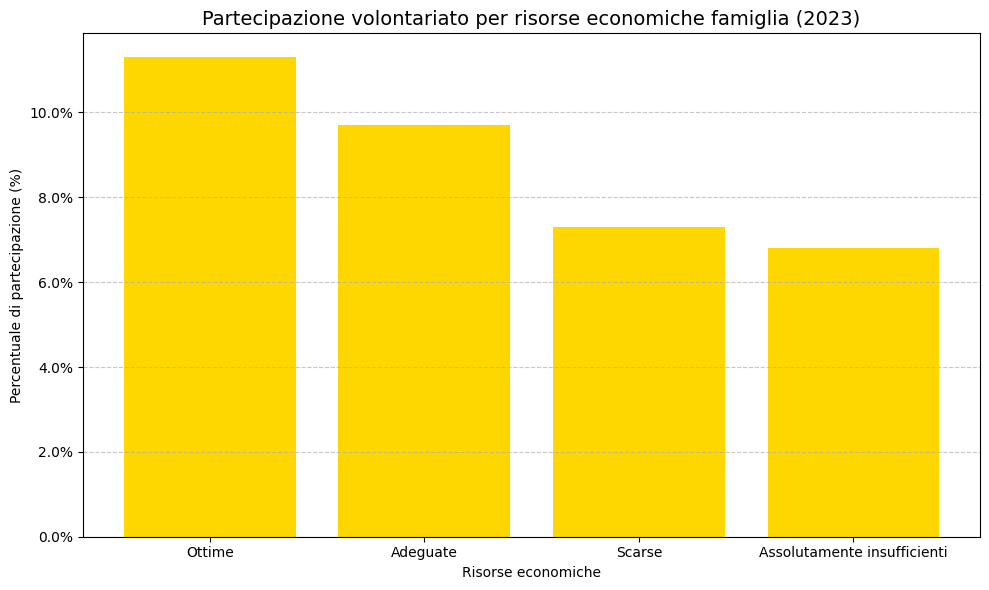

In [ ]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

# Caricamento del file originale VOLON1_5 per le mappe (descrizioni)
df_originale_5 = pd.read_csv("datasets/AMPIEZZA_FAMIGLIA_CONDIZIONI_ECONOMICHE.csv", sep="\t")

# Mappa per risorse economiche
mappa_risorse_df = df_originale_5[['FAM_ECON_RESOURCES', 'Risorse economiche della famiglia']].drop_duplicates()
# Creaiamo un dizionario con la mappatura, essendo però che i codici potrebbero essere sia integer che string allora
# forziamo il codice a stringa per evitare problemi di tipo nel mapping successivo se necessario
mappa_risorse = dict(zip(mappa_risorse_df['FAM_ECON_RESOURCES'], mappa_risorse_df['Risorse economiche della famiglia'])) # zip prende delle tuple/lista e le unisce insieme
print("\nMappa risorse economiche trovata:")
print(mappa_risorse)

# Mappa per ampiezza famiglia
mappa_famiglia_df = df_originale_5[['NUMBER_HOUSEHOLD_COMP', 'Ampiezza della famiglia']].drop_duplicates()
mappa_famiglia = dict(zip(mappa_famiglia_df['NUMBER_HOUSEHOLD_COMP'], mappa_famiglia_df['Ampiezza della famiglia']))
print("\nMappa ampiezza famiglia trovata:")
print(mappa_famiglia)

color_palette = {'blu': 'blue', 'rosso': 'red', 'verde': 'green', 'viola': 'purple', 'oro': 'gold'}

print("\nEsecuzione analisi sulle risorse economiche")

# Filtro su percentuale
df_ricchezza = df[df['Indicatore_Code'] == VVOL_P].copy()

# Filtro per i dati utilizzati dall'analisi
df_ricchezza_filtrato = df_ricchezza[
    (df_ricchezza['Anno'] == 2023) &
    (df_ricchezza['RisorseEconomiche_Code'].notnull()) &
    (df_ricchezza['RisorseEconomiche_Code'] != 'ALL') &
    (df_ricchezza['TipoVolontariato_Code'] == 'TOTAL')
].copy()

if df_ricchezza_filtrato.empty:
    print("Dati per analisi ricchezza non trovati")
else:
    # Mappa delle descrizioni
    df_ricchezza_filtrato['Risorse'] = df_ricchezza_filtrato['RisorseEconomiche_Code'].map(mappa_risorse)
    
    # Se il mapping fallisce (NaN), provare a convertire i codici in int o str
    if df_ricchezza_filtrato['Risorse'].isnull().any():
            # Provare a convertire la chiave del dizionario in stringa
            mappa_risorse_str = {str(k): v for k, v in mappa_risorse.items()}
            df_ricchezza_filtrato['Risorse'] = df_ricchezza_filtrato['RisorseEconomiche_Code'].astype(str).map(mappa_risorse_str)
    
    # Trovare i valori univoci mappati
    valori_presenti = df_ricchezza_filtrato['Risorse'].dropna().unique()
    # Definizione ordine se i valori matchano
    ordine_preferenziale = ['Ottime', 'Adeguate', 'Scarse', 'Assolutamente insufficienti', 'Insufficienti']
    ordine_effettivo = [x for x in ordine_preferenziale if x in valori_presenti]
    
    if not ordine_effettivo: # Se not matchano, usare ordine trovato
            ordine_effettivo = list(valori_presenti)

    df_ricchezza_filtrato['Risorse'] = pd.Categorical(
        df_ricchezza_filtrato['Risorse'], categories=ordine_effettivo, ordered=True
    )
    df_ricchezza_sorted = df_ricchezza_filtrato.sort_values('Risorse') # Ordinamento valori per lista ordinamento_effettivo
    
    print("Dati per Analisi Ricchezza:")
    print(df_ricchezza_sorted[['Risorse', 'Valore']])

    # Grafico a barre
    plt.figure(figsize=(10, 6))
    plt.bar(df_ricchezza_sorted['Risorse'], df_ricchezza_sorted['Valore'], color=color_palette['oro'])
    plt.title('Partecipazione volontariato per risorse economiche famiglia (2023)', fontsize=14)
    plt.ylabel('Percentuale di partecipazione (%)')
    plt.xlabel('Risorse economiche')
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%') # Formattazione percentuale a 1 cifra decimale
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_ricchezza.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("\nEsecuzione analisi sulle risorse economiche completata")

print(f"""
Dall'analisi si deriva come le famiglie con la maggior partecipazione ad attività di volontariato sono quelle con risorse economiche {df_ricchezza_sorted['Risorse'].iloc[0]} con un valore di {df_ricchezza_sorted['Valore'].max()}.
Quelle con la minor partecipazione invece sono le famiglie con risorse economihce {df_ricchezza_sorted['Risorse'].iloc[len(df_ricchezza_sorted)-1]} con un valore di {df_ricchezza_sorted['Valore'].min()}.

Generalmente, guardando il grafico si può vedere come al diminuire delle risorse economiche ci sia una diminuzione anche della partecipazione del volontariato da parte di quest'ultime
""")


Analisi sull'ampiezza della famiglia
Dati per analisi famiglia:
    Famiglia  Valore
829        1    10.5
831        2     9.5
833        3     8.2
835        4     8.7
837  5 e più     8.2
Grafico 'results_assets/analisi_famiglia.png' salvato

Analisi sull'ampiezza della famiglia completata

Dall'analisi emerge che la famiglia che ha la maggior partecipazione al volontariato è statisticamente quella con 1 componente/i.
La famigli che ha la minor partecupazione invece è statisticamente quella con 3 componente/i.



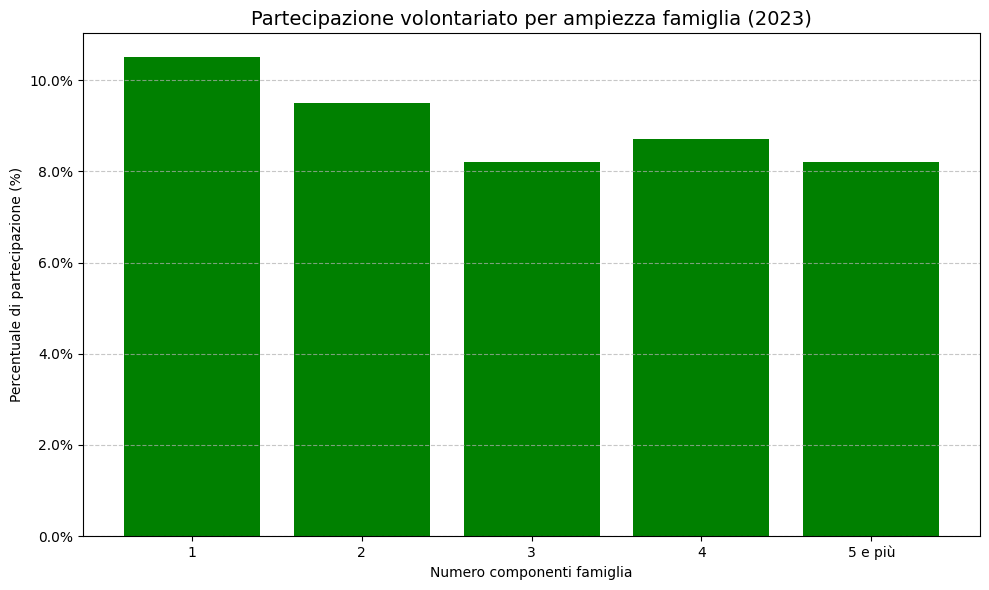

In [67]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

print("\nAnalisi sull'ampiezza della famiglia")
# Filtro per percentuale
df_famiglia = df[df['Indicatore_Code'] == VVOL_P].copy()

# Filtro dati validi
df_famiglia_filtrato = df_famiglia[
    (df_famiglia['Anno'] == 2023) &
    (df_famiglia['AmpiezzaFamiglia_Code'].notnull()) &
    (df_famiglia['AmpiezzaFamiglia_Code'] != 'TOT') &
    (df_famiglia['TipoVolontariato_Code'] == 'TOTAL')
].copy()

if df_famiglia_filtrato.empty:
    print("Dati per analisi famiglia non trovati")
else:
    # Mapping
    mappa_famiglia_str = {str(k): v for k, v in mappa_famiglia.items()}
    df_famiglia_filtrato['Famiglia'] = df_famiglia_filtrato['AmpiezzaFamiglia_Code'].astype(str).map(mappa_famiglia_str)
    
    # Recuperiamo l'ordine dalle descrizioni mappate
    valori_presenti_fam = df_famiglia_filtrato['Famiglia'].dropna().unique()
    # Costruiamo un ordine basato sui codici originali ordinati
    codici_ordinati = sorted(df_famiglia_filtrato['AmpiezzaFamiglia_Code'].unique())
    # Creiamo la lista ordinata delle descrizioni corrispondenti
    ordine_descrizioni = [mappa_famiglia_str[str(c)] for c in codici_ordinati if str(c) in mappa_famiglia_str]
    
    df_famiglia_filtrato['Famiglia'] = pd.Categorical(
        df_famiglia_filtrato['Famiglia'], categories=ordine_descrizioni, ordered=True
    )
    df_famiglia_sorted = df_famiglia_filtrato.sort_values('Famiglia')
    
    print("Dati per analisi famiglia:")
    print(df_famiglia_sorted[['Famiglia', 'Valore']])

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(df_famiglia_sorted['Famiglia'], df_famiglia_sorted['Valore'], color=color_palette['verde'])
    plt.title('Partecipazione volontariato per ampiezza famiglia (2023)', fontsize=14)
    plt.ylabel('Percentuale di partecipazione (%)')
    plt.xlabel('Numero componenti famiglia')
    
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_famiglia.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("\nAnalisi sull'ampiezza della famiglia completata")

print(f"""
Dall'analisi emerge che la famiglia che ha la maggior partecipazione al volontariato è statisticamente quella con {df_famiglia_filtrato.sort_values('Valore', ascending=False)['Famiglia'].iloc[0]} componente/i.
La famigli che ha la minor partecupazione invece è statisticamente quella con {df_famiglia_filtrato.sort_values('Valore', ascending=True)['Famiglia'].iloc[0]} componente/i.
""")

/tmp/ipykernel_57699/1611871537.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette_geo = plt.cm.get_cmap('Dark2', 5)
/tmp/ipykernel_57699/1611871537.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette_eta = plt.cm.get_cmap('tab10', 7)



Analisi sull'evoluzione geografica (2013 vs 2023)
Dati pivot per analisi sull'evoluzione geografica:
Territorio_Code   ITC   ITD   ITE  ITF   ITG
Anno                                        
2013             14.0  16.1  13.5  8.7  10.5
2023             10.9  13.1   8.8  4.7   7.3
Grafico 'results_assets/analisi_evoluzione_geografica.png' salvato

Analisi sull'evoluzione geografica (2013 vs 2023)

Dall'analisi sono figurati i seguenti dati:

Nord-Ovest: il valore di partecipazione è passato da 14.0 nel 2013 a 10.9 nel 2023 con una variazione del -3.1%
Nord-Est: il valore di partecipazione è passato da 16.1 nel 2013 a 13.1 nel 2023 con una variazione del -3.0%
Centro: il valore di partecipazione è passato da 13.5 nel 2013 a 8.8 nel 2023 con una variazione del -4.7%
Sud: il valore di partecipazione è passato da 8.7 nel 2013 a 4.7 nel 2023 con una variazione del -4.0%
Isole: il valore di partecipazione è passato da 10.5 nel 2013 a 7.3 nel 2023 con una variazione del -3.2%

Territorio_Code

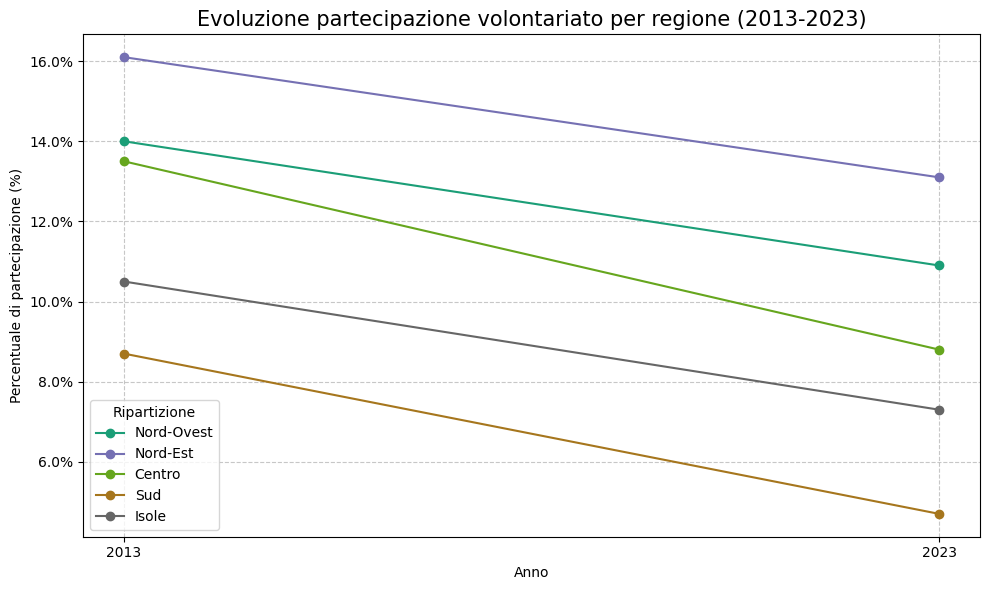

In [ ]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

# Definiamo le palette di colori
palette_geo = plt.cm.get_cmap('Dark2', 5)
palette_eta = plt.cm.get_cmap('tab10', 7)
color_anni = {'2013': '#007ACC', '2023': '#FF7F0E'}

print("\nAnalisi sull'evoluzione geografica (2013 vs 2023)")

# Filtro sui dati per l'analisi
df_percent = df[df['Indicatore_Code'] == VVOL_P].copy()
ripartizioni_codes = ['ITC', 'ITD', 'ITE', 'ITF', 'ITG']
map_ripartizioni = {
    'ITC': 'Nord-Ovest', 'ITD': 'Nord-Est', 'ITE': 'Centro',
    'ITF': 'Sud', 'ITG': 'Isole'
} # Mapping dei codici con relativa descrizione

# Filtro dati per l'analisi
df_geo = df_percent[
    (df_percent['Anno'].isin([2013, 2023])) &
    (df_percent['TipoVolontariato_Code'] == 'TOTAL') &
    (df_percent['Territorio_Code'].isin(ripartizioni_codes))
]

# Isoliamento dei totali
dim_cols = ['AmpiezzaFamiglia_Code', 'RisorseEconomiche_Code', 'Sesso_Code', 
            'AnniAttivita_Code', 'TipoAttivita_Code', 'TitoloStudio_Code', 
            'CondizioneLavorativa_Code', 'Eta_Code']
df_geo_totals = df_geo[df_geo[dim_cols].isnull().all(axis=1)].copy() # Isola la riga su quella del totale

if df_geo_totals.empty:
    print("Dati per analisi di evoluzione geografica non trovati")
else:
    # Pivot table
    df_pivot_geo = df_geo_totals.pivot_table(
        index='Anno',
        columns='Territorio_Code',
        values='Valore'
    )
    
    print("Dati pivot per analisi sull'evoluzione geografica:")
    print(df_pivot_geo)
    
    # Grafico a linee
    plt.figure(figsize=(10, 6))
    for i, code in enumerate(ripartizioni_codes): # Ciclo su i codici ripartizione individuati
        if code in df_pivot_geo.columns: # Se il codice è nella pivot
            plt.plot(df_pivot_geo.index, df_pivot_geo[code], label=map_ripartizioni[code], marker='o', color=palette_geo(i)) # Crea la linea per quel codice
    
    plt.title('Evoluzione partecipazione volontariato per regione (2013-2023)', fontsize=15)
    plt.ylabel('Percentuale di partecipazione (%)')
    plt.xlabel('Anno')
    plt.xticks([2013, 2023]) # Entrambi anni visibili
    plt.legend(title='Ripartizione')
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%') # Formattazione su 1 cifra decimale ed espresso in %
    plt.gca().yaxis.set_major_formatter(formatter) # Applica
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_evoluzione_geografica.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print("\nAnalisi sull'evoluzione geografica (2013 vs 2023)")

print(f"""
Dall'analisi sono figurati i seguenti dati:
      
{map_ripartizioni[df_pivot_geo['ITC'].name]}: il valore di partecipazione è passato da {df_pivot_geo['ITC'].loc[2013]} nel 2013 a {df_pivot_geo['ITC'].loc[2023]} nel 2023 con una variazione del {((df_pivot_geo['ITC'].loc[2023])-(df_pivot_geo['ITC'].loc[2013])).round(1)}%
{map_ripartizioni[df_pivot_geo['ITD'].name]}: il valore di partecipazione è passato da {df_pivot_geo['ITD'].loc[2013]} nel 2013 a {df_pivot_geo['ITD'].loc[2023]} nel 2023 con una variazione del {((df_pivot_geo['ITD'].loc[2023])-(df_pivot_geo['ITD'].loc[2013])).round(1)}%
{map_ripartizioni[df_pivot_geo['ITE'].name]}: il valore di partecipazione è passato da {df_pivot_geo['ITE'].loc[2013]} nel 2013 a {df_pivot_geo['ITE'].loc[2023]} nel 2023 con una variazione del {((df_pivot_geo['ITE'].loc[2023])-(df_pivot_geo['ITE'].loc[2013])).round(1)}%
{map_ripartizioni[df_pivot_geo['ITF'].name]}: il valore di partecipazione è passato da {df_pivot_geo['ITF'].loc[2013]} nel 2013 a {df_pivot_geo['ITF'].loc[2023]} nel 2023 con una variazione del {((df_pivot_geo['ITF'].loc[2023])-(df_pivot_geo['ITF'].loc[2013])).round(1)}%
{map_ripartizioni[df_pivot_geo['ITG'].name]}: il valore di partecipazione è passato da {df_pivot_geo['ITG'].loc[2013]} nel 2013 a {df_pivot_geo['ITG'].loc[2023]} nel 2023 con una variazione del {((df_pivot_geo['ITG'].loc[2023])-(df_pivot_geo['ITG'].loc[2013])).round(1)}%

La zona geografica con la peggiore performance negli anni è stata: {map_ripartizioni[df_pivot_geo[(df_pivot_geo.loc[2023]-df_pivot_geo.loc[2013]).sort_values().idxmin()].name]}.
La migliore per performance negli anni invece è stata: {map_ripartizioni[df_pivot_geo[(df_pivot_geo.loc[2023]-df_pivot_geo.loc[2013]).sort_values(ascending=False).idxmax()].name]}.
""")


Analisi evoluzione demografica per età (2013 vs 2023)
Dati pivot per analisi:
Eta_Code  Y15-24  Y25-34  Y35-44  Y45-54  Y55-64  Y65-74  Y_GE75
Anno                                                            
2013        10.4    11.4    13.7    15.6    15.9    13.1     5.9
2023         6.9     7.2     8.9    10.0    11.2    12.3     6.1
Grafico 'analisi_evoluzione_eta.png' salvato


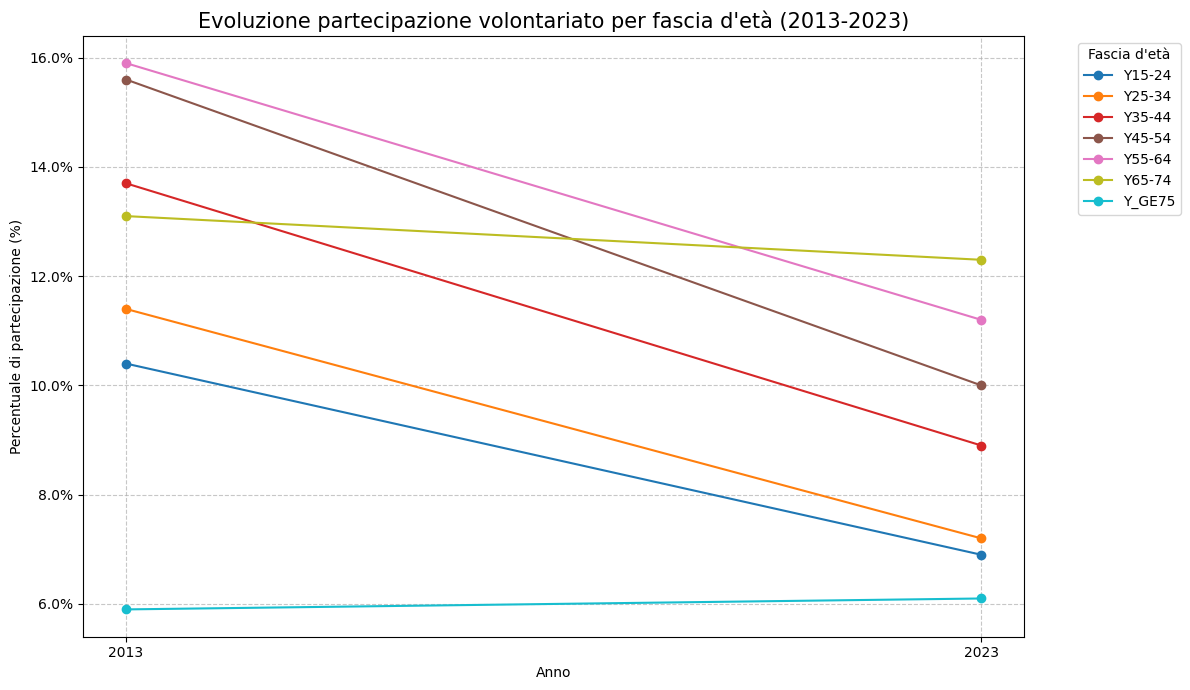

In [123]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

print("\nAnalisi evoluzione demografica per età (2013 vs 2023)")

# Filtro sui dati
df_percent = df[df['Indicatore_Code'] == 'PGE15_UAPV'].copy()
eta_order = ['Y15-24', 'Y25-34', 'Y35-44', 'Y45-54', 'Y55-64', 'Y65-74', 'Y_GE75'] # Ordinamento

# Dataset filtrato
df_eta_filtrato = df_percent[
    (df_percent['Anno'].isin([2013, 2023])) &
    (df_percent['Eta_Code'].isin(eta_order)) &
    (df_percent['Sesso_Code'] == 9) &
    (df_percent['TipoVolontariato_Code'] == 'TOTAL') &
    (df_percent['Territorio_Code'] == 'IT')
]

if df_eta_filtrato.empty:
    print("Dati per analisi su evoluzione demografica per età non trovati")
else:
    # Pivot table
    df_pivot_eta = df_eta_filtrato.pivot_table(
        index='Anno',
        columns='Eta_Code',
        values='Valore'
    )
    
    # Riordinamento per colonna età
    # In questo caso non si usa il pd.Categorical in quanto non perforza necessario, si potrebbe fare ma necessiterebbe di più righe di codice
    # Con questa riga le colonne della tabella si ordinano automaticamente, in quanto gli viene passata una lista:
    # https://www.geeksforgeeks.org/python/change-the-order-of-a-pandas-dataframe-columns-in-python/
    df_pivot_eta = df_pivot_eta[eta_order]
    
    print("Dati pivot per analisi:")
    print(df_pivot_eta)
    
    # Grafico a barre
    plt.figure(figsize=(12, 7))
    for i, eta_code in enumerate(eta_order): # Per ogni codice nella lista età
        plt.plot(df_pivot_eta.index, df_pivot_eta[eta_code], label=eta_code, marker='o', color=palette_eta(i)) # Linea
        
    plt.title('Evoluzione partecipazione volontariato per fascia d\'età (2013-2023)', fontsize=15)
    plt.ylabel('Percentuale di partecipazione (%)')
    plt.xlabel('Anno')
    plt.xticks([2013, 2023])
    plt.legend(title='Fascia d\'età', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%') # Formattazione a 1 cifra decimale
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_evoluzione_eta.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filename}' salvato")


Analisi evoluzione ore medie per condizione lavorativa
Dati pivot per analisi:
Anno                       2013  2023
CondizioneLavorativa_Code            
Occupato                   15.8  13.8
Studente                   16.7  19.4
Ritirato (Pensionato)      25.9  23.1
In cerca di occupazione    19.7  20.0
Grafico 'results_assets/analisi_evoluzione_ore_lavoro.png' salvato
Dall'analisi si osserva una diminuzione delle ore medie dedicate sia dai Pensionati 
   (scesi da 25.9 a 23.1 ore) sia dagli Occupati 
   (da 15.8 a 13.8 ore). 
   Questo suggerisce che queste categorie, pur rimanendo numerose, hanno meno tempo 
   da dedicare rispetto a 10 anni fa.
   Al contrario, le categorie "non lavorative" mostrano un trend positivo. 
   Gli Studenti hanno aumentato significativamente il loro impegno 
   (da 16.7 a 19.4 ore), diventando una delle 
   categorie più attive in termini di intensità. 
   Anche chi è in cerca di occupazione mantiene un impegno molto alto e stabile 
   (passando da 19.

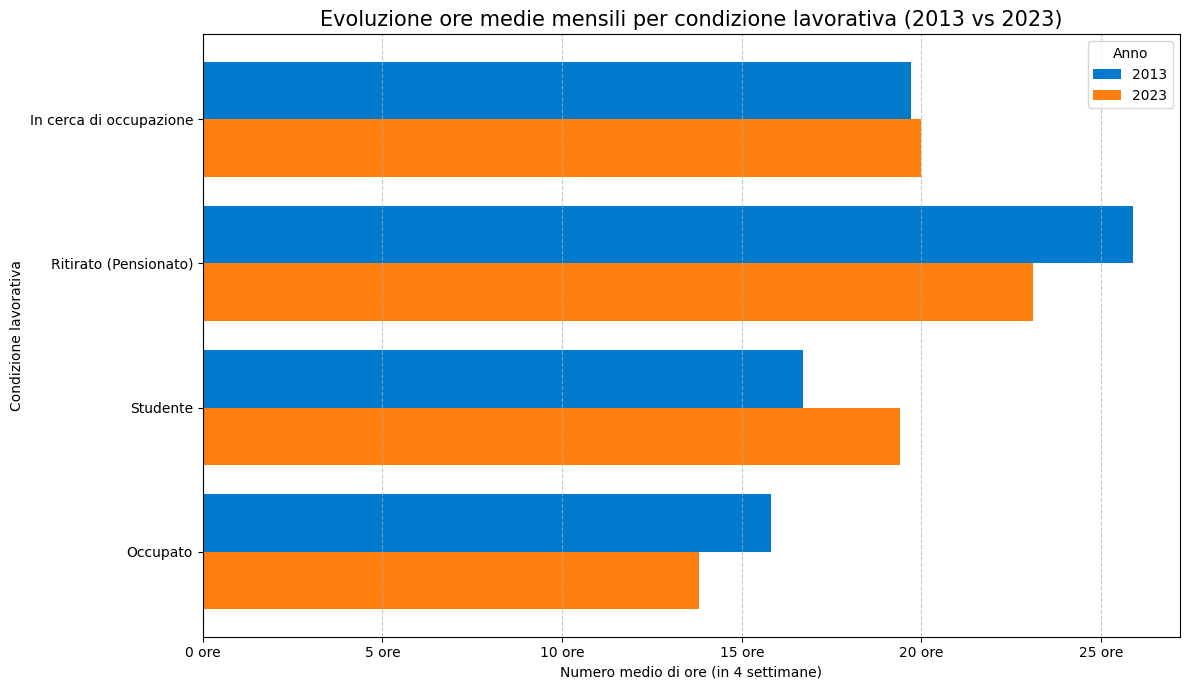

In [10]:
# Caricamento Dataframe finale dal path creato prima
try:
    df = pd.read_csv(final_dataset_path)
except FileNotFoundError:
    print(f"File {final_dataset_path} non trovato")
    exit()
except Exception as e:
    print(f"Errore generale nel caricamento del file {file_path}: {e}")
    exit()

print("\nAnalisi evoluzione ore medie per condizione lavorativa")

# Filtro dei dati
df_ore = df[df['Indicatore_Code'] == MEDN_ORE].copy()
color_anni = {'2013': '#007ACC', '2023': '#FF7F0E'}
codici_lavoro_validi = [1.0, 5.0, 6.0, 12.0] # Occupato, Studente, Ritirato, In cerca
map_lavoro = {
    1.0: 'Occupato', 5.0: 'Studente', 6.0: 'Ritirato (Pensionato)', 12.0: 'In cerca di occupazione'
}

# Dataframe filtrato per analisi
df_lavoro_filtrato = df_ore[
    (df_ore['Anno'].isin([2013, 2023])) &
    (df_ore['CondizioneLavorativa_Code'].isin(codici_lavoro_validi)) &
    (df_ore['TitoloStudio_Code'] == 99) &
    (df_ore['TipoVolontariato_Code'] == 'TOTAL') &
    (df_ore['Territorio_Code'] == 'IT')
].copy()

if df_lavoro_filtrato.empty:
    print("Dati per analisi di evoluzione delle ore medie per condizione lavorativa non trovati")
else:
    # Creazione tabella pivot
    df_pivot_lavoro = df_lavoro_filtrato.pivot_table(
        index='CondizioneLavorativa_Code',
        columns='Anno',
        values='Valore'
    )
    
    # Mappiamo l'indice per le descrizioni
    df_pivot_lavoro.index = df_pivot_lavoro.index.map(map_lavoro)
    
    print("Dati pivot per analisi:")
    print(df_pivot_lavoro)
    
    # Grafico a barre raggruppate
    plt.figure(figsize=(12, 7))
    
    n_gruppi = len(df_pivot_lavoro.index)
    ind = np.arange(n_gruppi) # Posizioni Y
    height = 0.4 # Altezza delle barre
    
    # Barre 2013 (a sinistra)
    plt.barh(ind + height/2, df_pivot_lavoro[2013], height, label='2013', color=color_anni['2013'])
    # Barre 2023 (a destra)
    plt.barh(ind - height/2, df_pivot_lavoro[2023], height, label='2023', color=color_anni['2023'])
    
    plt.title('Evoluzione ore medie mensili per condizione lavorativa (2013 vs 2023)', fontsize=15)
    plt.xlabel('Numero medio di ore (in 4 settimane)')
    plt.ylabel('Condizione lavorativa')
    plt.yticks(ind, df_pivot_lavoro.index)
    plt.legend(title='Anno')
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x:.0f} ore') # Formattazione a 0 cifre decimali
    plt.gca().xaxis.set_major_formatter(formatter)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    result_filename = "analisi_evoluzione_ore_lavoro.png"
    result_filepath = os.path.join(ASSETS_FOLDER_NAME, result_filename)
    plt.savefig(result_filepath)
    print(f"Grafico '{result_filepath}' salvato")

print(f"""Dall'analisi si osserva una diminuzione delle ore medie dedicate sia dai Pensionati 
(scesi da {df_pivot_lavoro.loc['Ritirato (Pensionato)', 2013]:.1f} a {df_pivot_lavoro.loc['Ritirato (Pensionato)', 2023]:.1f} ore) sia dagli Occupati 
(da {df_pivot_lavoro.loc['Occupato', 2013]:.1f} a {df_pivot_lavoro.loc['Occupato', 2023]:.1f} ore). 
Questo suggerisce che queste categorie, pur rimanendo numerose, hanno meno tempo da dedicare rispetto a 10 anni fa.
Al contrario, le categorie "non lavorative" mostrano un trend positivo. 
Gli Studenti hanno aumentato significativamente il loro impegno 
(da {df_pivot_lavoro.loc['Studente', 2013]:.1f} a {df_pivot_lavoro.loc['Studente', 2023]:.1f} ore), diventando una delle categorie più attive in termini di intensità. 
Anche chi è in cerca di occupazione mantiene un impegno molto alto e stabile 
(passando da {df_pivot_lavoro.loc['In cerca di occupazione', 2013]:.1f} a {df_pivot_lavoro.loc['In cerca di occupazione', 2023]:.1f} ore mensili).""")